In [2]:
import pyarrow
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Negative Control with non-enriched human tiles against tiled human IDRs

In [2]:
input_filename = 'results/finches_non-enriched-human-peptide-to-human-tiled-idr-interaction_results.parquet'

df = pq.read_table(input_filename).to_pandas()
print(df.columns)

df_attractive = df[df['interaction_type'] == 'attraction']
df_repulsive = df[df['interaction_type'] == 'repulsion']

print(len(df_attractive))
print(len(df_repulsive))

Index(['s1_id', 's2_id', 'mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1',
       'mean_epsilon', 'std_epsilon', 'interaction_type', 's1_length',
       's2_length', 's1_sequence', 's2_sequence'],
      dtype='object')
7102473
136060427


In [3]:
df_na = df[df['interaction_type'] == 'N/A']
print(len(df_na))
na_viruses = df['s1_id'].unique()
print(len(na_viruses))

0
95


In [3]:
df_interactions = pd.read_csv('data/human-proteom-interactions.csv')

# Create a mapping Series from df_interactions
# The index will be 'ID' and the values will be 'P53_Interaction'
id_to_p53_interaction_map = df_interactions.set_index('ID')['P53_Interaction']

df['P53_Interaction'] = df['s2_id'].map(id_to_p53_interaction_map)

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mean_epsilon', y='std_epsilon',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('Mean vs. Std Epsilon by Interaction')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

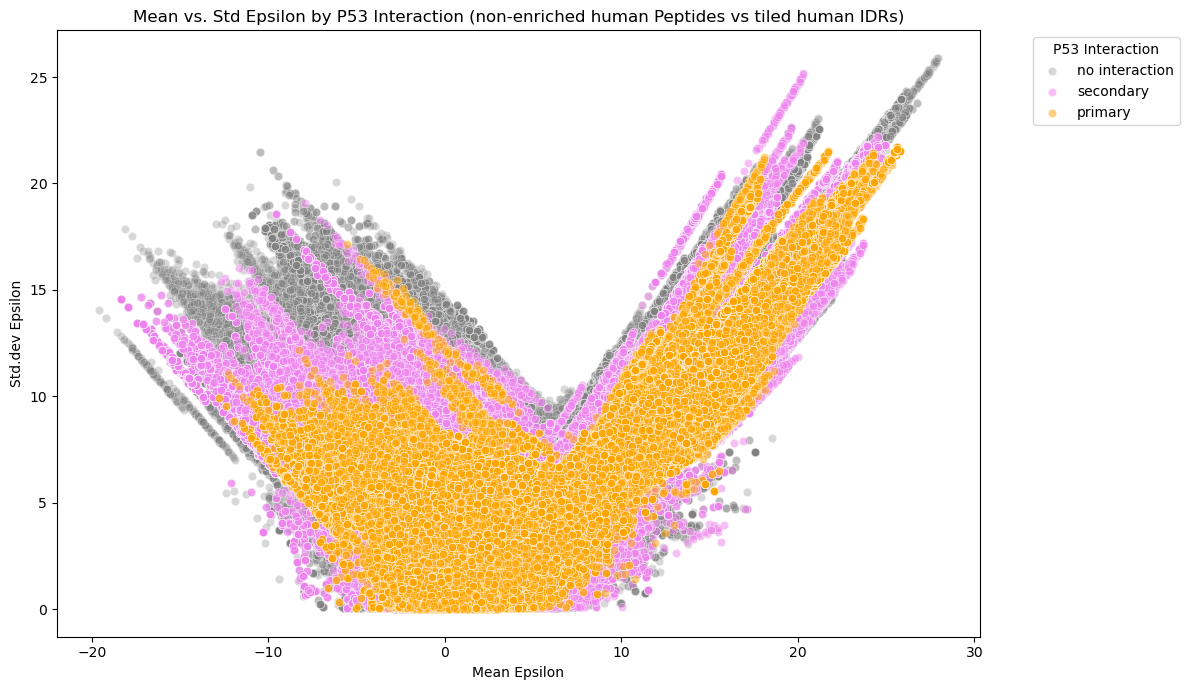

In [4]:
plt.figure(figsize=(12, 7))

# Define custom colors for each P53_Interaction category
custom_colors = {
    'primary': 'orange',
    'secondary': 'violet',
    'no interaction': 'gray'
}

# Plot 'no interaction' points first with lower transparency
# Plotting this group first ensures it appears underneath the others
sns.scatterplot(
    data=df[df['P53_Interaction'] == 'no interaction'],
    x='mean_epsilon',
    y='std_epsilon',
    color=custom_colors['no interaction'], # Set the color to gray
    alpha=0.3,  # Set transparency to be more transparent (e.g., 0.3)
    label='no interaction' # Add a label for the legend
)

# Plot 'secondary' points with higher transparency
sns.scatterplot(
    data=df[df['P53_Interaction'] == 'secondary'],
    x='mean_epsilon',
    y='std_epsilon',
    color=custom_colors['secondary'], # Set the color to violet
    alpha=0.5,  # Set transparency to be less transparent
    label='secondary' # Add a label for the legend
)

# Plot 'primary' points with higher transparency
sns.scatterplot(
    data=df[df['P53_Interaction'] == 'primary'],
    x='mean_epsilon',
    y='std_epsilon',
    color=custom_colors['primary'], # Set the color to orange
    alpha=0.5,  # Set transparency to be less transparent
    label='primary' # Add a label for the legend
)

plt.title('Mean vs. Std Epsilon by P53 Interaction (non-enriched human Peptides vs tiled human IDRs)')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')

# The legend will automatically collect the 'label' from each scatterplot call
plt.legend(title='P53 Interaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='mf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='cf_s1_s2', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('CF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='cf_s1_s2',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S1 in S2 Epsilon')
plt.ylabel('CF S1 in S2 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s2_s1', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S2 in S1 Epsilon')
plt.ylabel('CF S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [5]:
df_melted = df.melt(id_vars=['s1_id', 's2_id'],
                    value_vars=['mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1'],
                    var_name='metric_type',
                    value_name='value')

/scratch/995179.1.apolkovnikov-pub/ipykernel_993798/1653954801.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


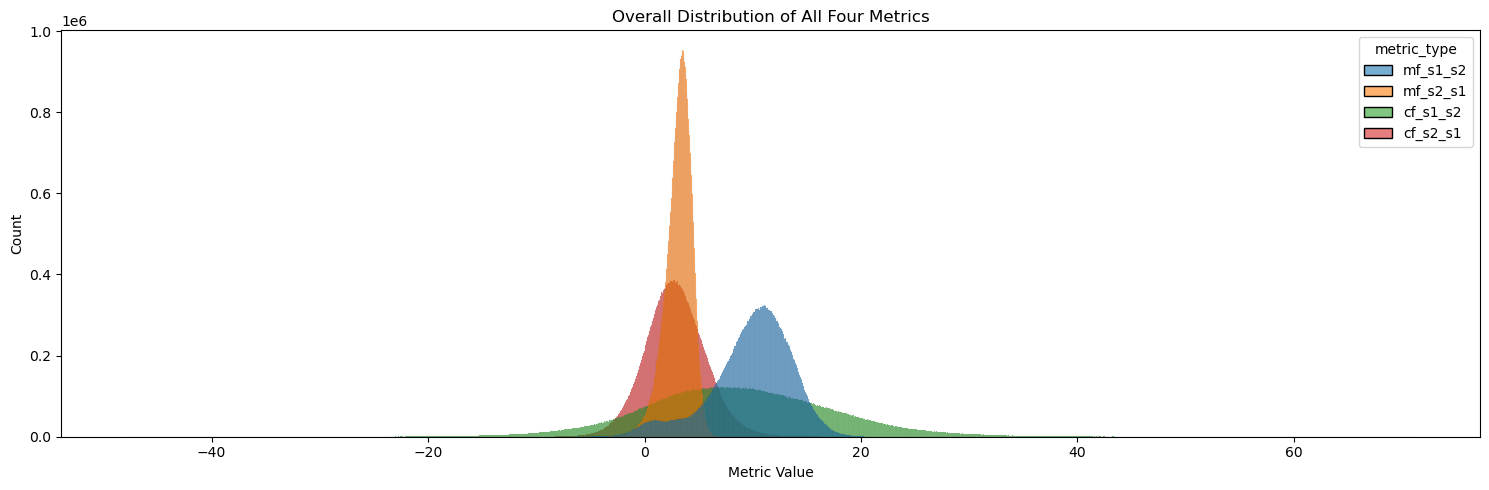

/scratch/995179.1.apolkovnikov-pub/ipykernel_993798/1653954801.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


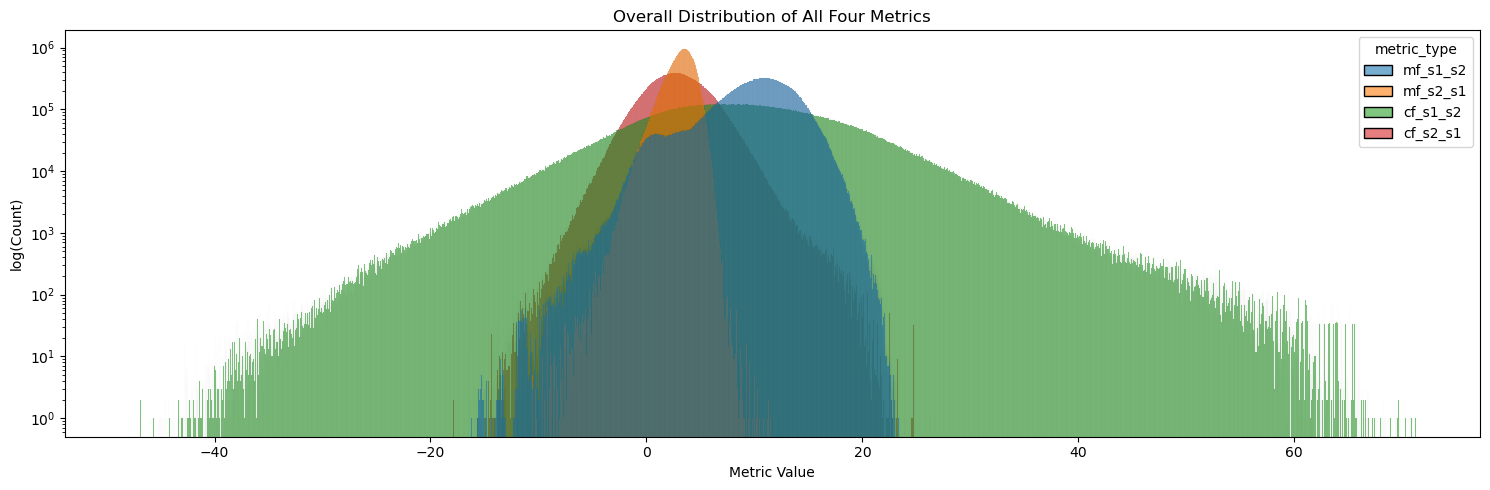

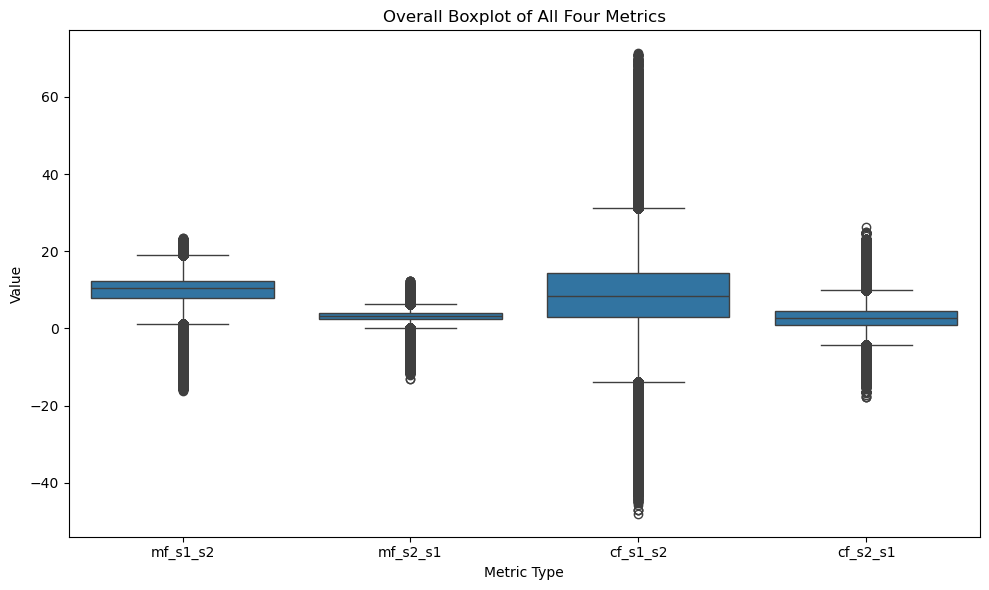

In [6]:
# Overall distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Overall log distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.yscale('log')
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('log(Count)')
plt.tight_layout()
plt.show()

# Boxplot comparing the overall distributions of the 4 metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='metric_type', y='value')
plt.title('Overall Boxplot of All Four Metrics')
plt.xlabel('Metric Type')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Control with all 27 enriched human tiles against tiled human IDRs

In [7]:
# Filter wrong tiles (had all significant and not just enriched human tiles in there before)
input_filename = 'results/finches_all83-significant-human-peptide-to-human-tiled-idr-interaction_results.parquet'
corrected_filename = 'results/finches_all27-enriched-human-peptide-to-human-tiled-idr-interaction_results.parquet'

enriched_human_tiles = ["HN_01801", "HN_00106", "HP_01317", "HP_00033", "HP_02517", "HN_00182", "HP_02234", "HN_01083", "HN_01276", "HN_01762", "HN_01876", "HN_00607", "HN_01277", "HP_01200", "HN_01438", "HN_00717", "HN_01765", "HP_02509", "HP_02231", "HP_01967", "HN_00458", "HP_02180", "HN_01015", "HP_01021", "HP_00319", "HN_00685", "HP_00223"]

df = pq.read_table(input_filename).to_pandas()

# Filter out rows where 's1_id' starts with 'HN_' or 'HP_'
df_filtered = df[df['s1_id'].isin(enriched_human_tiles)]

# Save the filtered DataFrame back to the same parquet file
df_filtered.to_parquet(corrected_filename, index=False)

print(f"Filtered out rows where 's1_id' started with 'HN_' or 'HP_'.")
print(f"Original number of rows: {len(df)}")
print(f"Filtered number of rows: {len(df_filtered)}")
print(f"Saved the filtered data to: {corrected_filename}")

Filtered out rows where 's1_id' started with 'HN_' or 'HP_'.
Original number of rows: 118825207
Filtered number of rows: 38653983
Saved the filtered data to: results/finches_all27-enriched-human-peptide-to-human-tiled-idr-interaction_results.parquet


In [8]:
input_filename = 'results/finches_all27-enriched-human-peptide-to-human-tiled-idr-interaction_results.parquet'

df = pq.read_table(input_filename).to_pandas()
print(df.columns)

df_attractive = df[df['interaction_type'] == 'attraction']
df_repulsive = df[df['interaction_type'] == 'repulsion']

print(len(df_attractive))
print(len(df_repulsive))

Index(['s1_id', 's2_id', 'mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1',
       'mean_epsilon', 'std_epsilon', 'interaction_type', 's1_length',
       's2_length', 's1_sequence', 's2_sequence'],
      dtype='object')
12853874
25800109


In [8]:
df_na = df[df['interaction_type'] == 'N/A']
print(len(df_na))
na_viruses = df['s1_id'].unique()
print(len(na_viruses))

0
83


In [9]:
df_interactions = pd.read_csv('data/human-proteom-interactions.csv')

# Create a mapping Series from df_interactions
# The index will be 'ID' and the values will be 'P53_Interaction'
id_to_p53_interaction_map = df_interactions.set_index('ID')['P53_Interaction']

df['P53_Interaction'] = df['s2_id'].map(id_to_p53_interaction_map)

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mean_epsilon', y='std_epsilon',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('Mean vs. Std Epsilon by Interaction')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

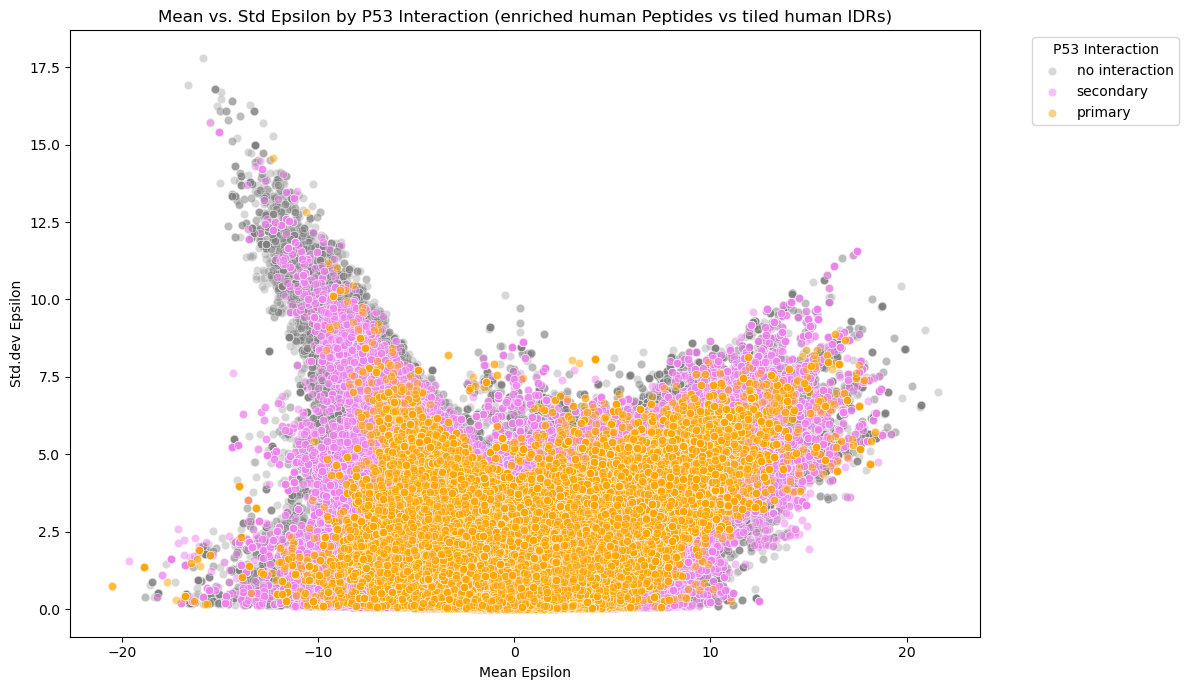

In [10]:
plt.figure(figsize=(12, 7))

# Define custom colors for each P53_Interaction category
custom_colors = {
    'primary': 'orange',
    'secondary': 'violet',
    'no interaction': 'gray'
}

# Plot 'no interaction' points first with lower transparency
# Plotting this group first ensures it appears underneath the others
sns.scatterplot(
    data=df[df['P53_Interaction'] == 'no interaction'],
    x='mean_epsilon',
    y='std_epsilon',
    color=custom_colors['no interaction'], # Set the color to gray
    alpha=0.3,  # Set transparency to be more transparent (e.g., 0.3)
    label='no interaction' # Add a label for the legend
)

# Plot 'secondary' points with higher transparency
sns.scatterplot(
    data=df[df['P53_Interaction'] == 'secondary'],
    x='mean_epsilon',
    y='std_epsilon',
    color=custom_colors['secondary'], # Set the color to violet
    alpha=0.5,  # Set transparency to be less transparent
    label='secondary' # Add a label for the legend
)

# Plot 'primary' points with higher transparency
sns.scatterplot(
    data=df[df['P53_Interaction'] == 'primary'],
    x='mean_epsilon',
    y='std_epsilon',
    color=custom_colors['primary'], # Set the color to orange
    alpha=0.5,  # Set transparency to be less transparent
    label='primary' # Add a label for the legend
)

plt.title('Mean vs. Std Epsilon by P53 Interaction (enriched human Peptides vs tiled human IDRs)')
plt.xlabel('Mean Epsilon')
plt.ylabel('Std.dev Epsilon')

# The legend will automatically collect the 'label' from each scatterplot call
plt.legend(title='P53 Interaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='mf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='cf_s1_s2', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('CF FF Epsilon by Interaction')
plt.xlabel('S1 in S2 Epsilon')
plt.ylabel('S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s1_s2', y='cf_s1_s2',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S1 in S2 Epsilon')
plt.ylabel('CF S1 in S2 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='mf_s2_s1', y='cf_s2_s1',
                hue='interaction_type', alpha=0.7, palette='viridis')
plt.title('MF vs CF FF Epsilon by Interaction')
plt.xlabel('MF S2 in S1 Epsilon')
plt.ylabel('CF S2 in S1 Epsilon')
plt.legend(title='Interaction', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()

In [11]:
df_melted = df.melt(id_vars=['s1_id', 's2_id'],
                    value_vars=['mf_s1_s2', 'mf_s2_s1', 'cf_s1_s2', 'cf_s2_s1'],
                    var_name='metric_type',
                    value_name='value')

/scratch/382526.1.ood/ipykernel_2480233/1653954801.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/projectnb/cancergrp/Philipp/.conda/envs/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


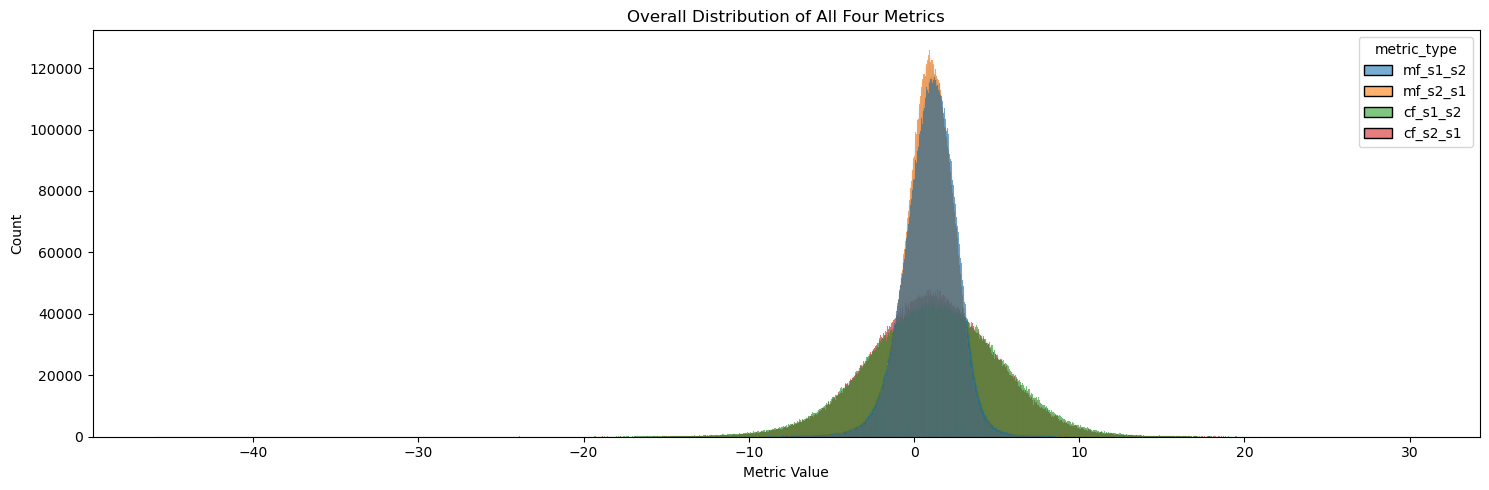

/scratch/382526.1.ood/ipykernel_2480233/1653954801.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/projectnb/cancergrp/Philipp/.conda/envs/jupyter_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


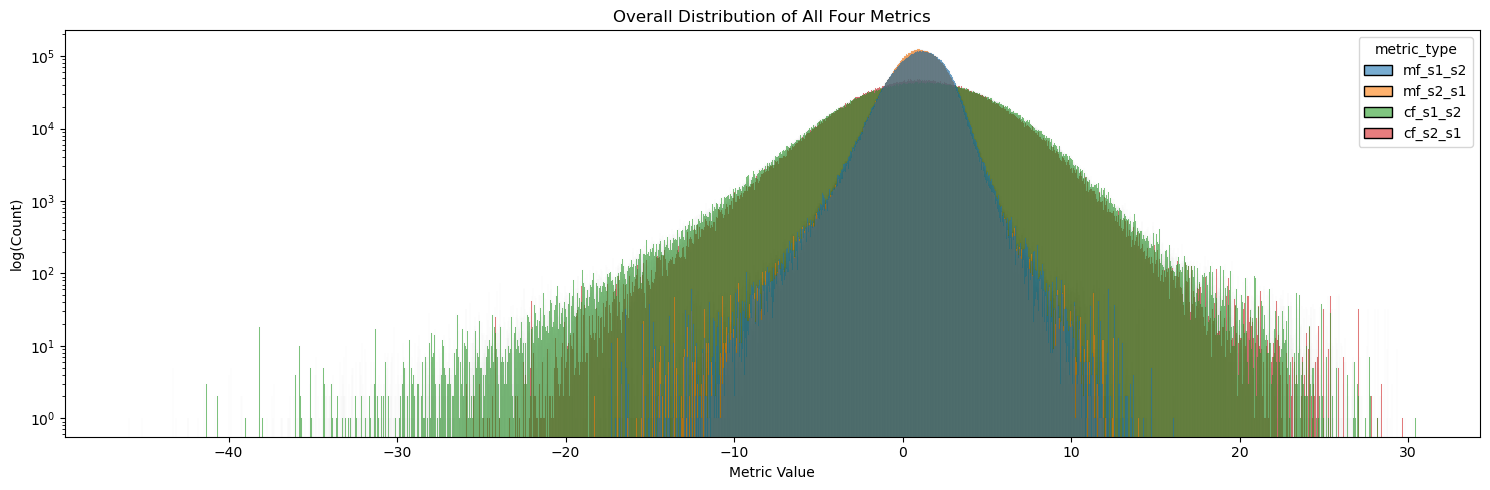

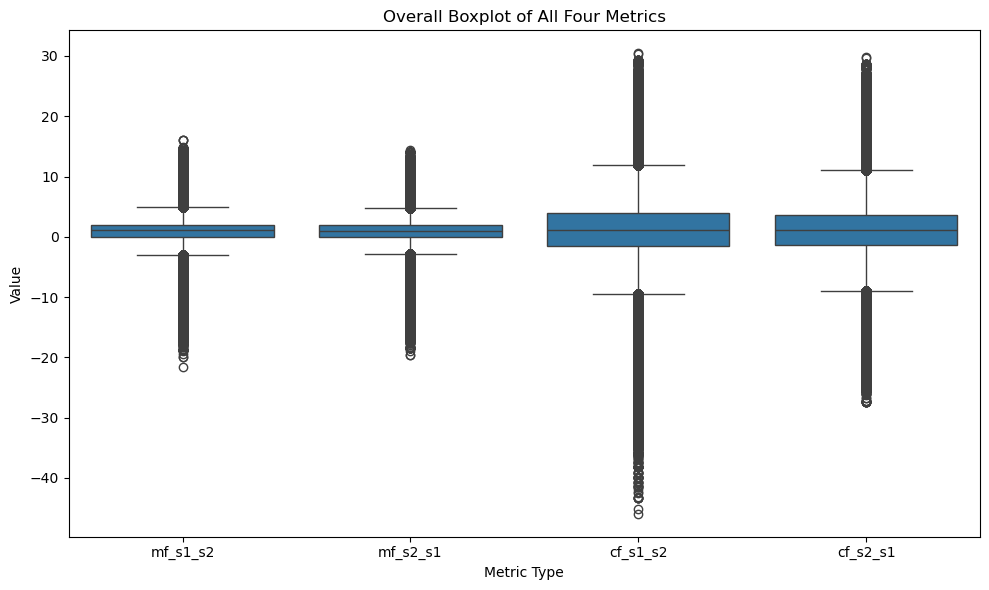

In [12]:
# Overall distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Overall log distribution of each metric
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df_melted, x='value', hue='metric_type', palette='tab10', alpha=0.6)
plt.yscale('log')
plt.title('Overall Distribution of All Four Metrics')
plt.xlabel('Metric Value')
plt.ylabel('log(Count)')
plt.tight_layout()
plt.show()

# Boxplot comparing the overall distributions of the 4 metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='metric_type', y='value')
plt.title('Overall Boxplot of All Four Metrics')
plt.xlabel('Metric Type')
plt.ylabel('Value')
plt.tight_layout()
plt.show()